Pandas is used in tandem with computing tools like numpy, acalytical libraries like statsmeodels and scikit-learn, and data visualization libraries like matplotlab.


## Difference between numpy and pandas
Pandas is designed for working with tabular or heterogeneous data. 
Numpy, works for array-based functions and a preference for data processing without `for` loops. 

In [75]:
"""  
Adding this block to show all outputs
"""

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


'  \nAdding this block to show all outputs\n'

In [76]:
import numpy as np
import pandas as pd

In [77]:
from pandas import Series, DataFrame

In [78]:
import numpy as np
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc("figure", figsize=(10, 6))
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
pd.options.display.max_columns = 20
pd.options.display.max_colwidth = 80
np.set_printoptions(precision=4, suppress=True)

## Dataframe attributes:

- `df.index`: return index object
- `df.columns`: return column object
- `df.dtypes`
- `df.shape`
- `df.ndim`
- `df.size`
- `df.values`: return numpy representation of the dataframe's data

## `pd.Series` attributes:

- Much like the same!

## Series

1D array-like object, containing a sequence of values. 

An associated array of data labels, called its index. 

In [79]:
obj = pd.Series([4, 7, -5, 3])
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [80]:
obj.array
obj.index

<PandasArray>
[4, 7, -5, 3]
Length: 4, dtype: int64

RangeIndex(start=0, stop=4, step=1)

Here, we create series with an index identifying data point with a label: 

In [81]:
obj2 = pd.Series([4, 7, -5, 3], index=["d", "b", "a", "c"])
obj2
obj2.index

d    4
b    7
a   -5
c    3
dtype: int64

Index(['d', 'b', 'a', 'c'], dtype='object')

Compared with numoy arrays you can yse labels in the index when selecting single values or a set of values:

In [82]:
obj2["a"] # selecting data by index
obj2["d"] = 6 # assigning data to an index
obj2[["c", "a", "d"]] # selecting multiple indices

-5

c    3
a   -5
d    6
dtype: int64

Filtering with a Boolean array

In [83]:
obj2[obj2 > 0]
obj2 * 2
import numpy as np
np.exp(obj2)

d    6
b    7
c    3
dtype: int64

d    12
b    14
a   -10
c     6
dtype: int64

d     403.428793
b    1096.633158
a       0.006738
c      20.085537
dtype: float64

Checking whether some index is in a pandas array?

In [84]:
"b" in obj2
"e" in obj2

True

False

Another way to think: A series is a fixed-length, ordered dictionary. 

In [85]:
sdata = {"Ohio": 35000, "Texas": 71000, "Oregon": 16000, "Utah": 5000}
obj3 = pd.Series(sdata)
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [86]:
obj3.to_dict()

{'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}

In [87]:
states = ["California", "Ohio", "Oregon", "Texas"]
obj4 = pd.Series(sdata, index=states)
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [88]:
pd.isna(obj4)
pd.notna(obj4)

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

In [89]:
obj4.isna()

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

All Series has an associative index on their sequential data. 

And Series automatically aligngs by index label in arithmetic operations. 

In [90]:
obj3
obj4
obj3 + obj4

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64

Series `.name` and `.index.name` functionality, integrated with other areas of pandas functionality

In [91]:
obj4.name = "population"
obj4.index.name = "state"
obj4

state
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64

Index can be altered in place by assignment. 

In [92]:
obj
obj.index = ["Bob", "Steve", "Jeff", "Ryan"]
obj

0    4
1    7
2   -5
3    3
dtype: int64

Bob      4
Steve    7
Jeff    -5
Ryan     3
dtype: int64

## Dataframe

- A dataframe represents a rectangular table of data and contains an ordered, named collection of columns. 
- Each column can have different calue tyupe. 
- Dataframe has both a row and column index, it can be though of as a dictionary of Series all sharing the same index. 

In [93]:
data = {"state": ["Ohio", "Ohio", "Ohio", "Nevada", "Nevada", "Nevada"],
        "year": [2000, 2001, 2002, 2001, 2002, 2003],
        "pop": [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data)

In [94]:
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


For large Dataframes, `head` method selects only the first five rows.

In [95]:
frame.head()

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


In [96]:
frame.tail()

,state,year,pop
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [97]:
pd.DataFrame(data, columns=["year", "state", "pop"])

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


In [98]:
frame2 = pd.DataFrame(data, columns=["year", "state", "pop", "debt"])
frame2
frame2.columns

,year,state,pop,debt
0,2000,Ohio,1.5,NaN
1,2001,Ohio,1.7,NaN
2,2002,Ohio,3.6,NaN
3,2001,Nevada,2.4,NaN
4,2002,Nevada,2.9,NaN
5,2003,Nevada,3.2,NaN


Index(['year', 'state', 'pop', 'debt'], dtype='object')

A column in a dataframe can be retrieved as a Series either by dictionary-like notaion or by using the dot-attribute notation. 

In [99]:
frame2["state"] # method 1
frame2.year # method 2

0      Ohio
1      Ohio
2      Ohio
3    Nevada
4    Nevada
5    Nevada
Name: state, dtype: object

0    2000
1    2001
2    2002
3    2001
4    2002
5    2003
Name: year, dtype: int64

Retrieving rows by position (`iloc`) or name (`loc`) attributes

In [100]:
frame2.loc[1]
frame2.iloc[2]

year     2001
state    Ohio
pop       1.7
debt      NaN
Name: 1, dtype: object

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: 2, dtype: object

In [101]:
frame2["debt"] = 16.5 # assigns 16.5 to all rows of debt column
frame2
frame2["debt"] = np.arange(6.) # assigns 0 to 5 float values
frame2

,year,state,pop,debt
0,2000,Ohio,1.5,16.5
1,2001,Ohio,1.7,16.5
2,2002,Ohio,3.6,16.5
3,2001,Nevada,2.4,16.5
4,2002,Nevada,2.9,16.5
5,2003,Nevada,3.2,16.5


,year,state,pop,debt
0,2000,Ohio,1.5,0.0
1,2001,Ohio,1.7,1.0
2,2002,Ohio,3.6,2.0
3,2001,Nevada,2.4,3.0
4,2002,Nevada,2.9,4.0
5,2003,Nevada,3.2,5.0


Assigning variables to column of DF

- If assigning lists / arrays: variable's length must match the length of the DataFrame.

- If assigning a Series, its labels will be realigned exactly to the DataFrame's index, inserting missing values in any index values not present. 

In [102]:
val = pd.Series([-1.2, -1.5, -1.7], index=["two", "four", "five"])
frame2["debt"] = val
frame2

,year,state,pop,debt
0,2000,Ohio,1.5,NaN
1,2001,Ohio,1.7,NaN
2,2002,Ohio,3.6,NaN
3,2001,Nevada,2.4,NaN
4,2002,Nevada,2.9,NaN
5,2003,Nevada,3.2,NaN


Assigning a column that doesn't exist will create a new column. 

In [103]:
frame2["eastern"] = frame2["state"] == "Ohio"
frame2

,year,state,pop,debt,eastern
0,2000,Ohio,1.5,NaN,True
1,2001,Ohio,1.7,NaN,True
2,2002,Ohio,3.6,NaN,True
3,2001,Nevada,2.4,NaN,False
4,2002,Nevada,2.9,NaN,False
5,2003,Nevada,3.2,NaN,False


In [104]:
del frame2["eastern"]
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

ANother interpertation: nested dictionary of dictionaries. 

In [105]:
populations = {"Ohio": {2000: 1.5, 2001: 1.7, 2002: 3.6},
               "Nevada": {2001: 2.4, 2002: 2.9}}

Outer dictionary keys as columns, inner keys as the row indices.

THis make sense when we have learned how we can combines Series with different indices into the same Dataframe. 

In [106]:
frame3 = pd.DataFrame(populations)
frame3

,Ohio,Nevada
2000,1.5,NaN
2001,1.7,2.4
2002,3.6,2.9


In [107]:
frame3.T

,2000,2001,2002
Ohio,1.5,1.7,3.6
Nevada,NaN,2.4,2.9


In [108]:
pd.DataFrame(populations, index=[2001, 2002, 2003])

,Ohio,Nevada
2001,1.7,2.4
2002,3.6,2.9
2003,NaN,NaN


In [109]:
pdata = {"Ohio": frame3["Ohio"][:-1],
         "Nevada": frame3["Nevada"][:2]}
pd.DataFrame(pdata)

,Ohio,Nevada
2000,1.5,NaN
2001,1.7,2.4


Dataframe's `index` and `columns` have their `name` attributes set.

In [110]:
frame3.index.name = "year"
frame3.columns.name = "state"
frame3

state,Ohio,Nevada
year,,
2000,1.5,NaN
2001,1.7,2.4
2002,3.6,2.9


- `to_numpy()` converts pandas into numpy arrays. 

- It is easy to do because it is just mapping the 2D arrays into 2D arrays but not keeping indices. 

In [111]:
frame3.to_numpy()

array([[1.5, nan],
       [1.7, 2.4],
       [3.6, 2.9]])

In [112]:
frame2.to_numpy()

array([[2000, 'Ohio', 1.5, nan],
       [2001, 'Ohio', 1.7, nan],
       [2002, 'Ohio', 3.6, nan],
       [2001, 'Nevada', 2.4, nan],
       [2002, 'Nevada', 2.9, nan],
       [2003, 'Nevada', 3.2, nan]], dtype=object)

## Index objects 

- They are responsible for holding the axis labels, and other metadata. 

- Some users will not often take advantage of teh capabilities provided by an index, because some operations will yield results containing indexed data. 

In [113]:
obj = pd.Series(np.arange(3), index=["a", "b", "c"])
index = obj.index # this return an index object.
index
index[1:] # index objects can be sliced

Index(['a', 'b', 'c'], dtype='object')

Index(['b', 'c'], dtype='object')

In [114]:
labels = pd.Index(np.arange(3))
labels
obj2 = pd.Series([1.5, -2.5, 0], index=labels)
obj2
obj2.index is labels

Int64Index([0, 1, 2], dtype='int64')

0    1.5
1   -2.5
2    0.0
dtype: float64

True

In [115]:
frame3
frame3.columns
"Ohio" in frame3.columns
2003 in frame3.index

state,Ohio,Nevada
year,,
2000,1.5,NaN
2001,1.7,2.4
2002,3.6,2.9


Index(['Ohio', 'Nevada'], dtype='object', name='state')

True

False

Unlike python's set, a panda index can contain duplicate labels. 

In [116]:
pd.Index(["foo", "foo", "bar", "bar"])

Index(['foo', 'foo', 'bar', 'bar'], dtype='object')

## Reindexing

- `reindex` means creating a new object with the values rearranged to align with the new index. Introducing missing values if any index values were not already present: 

In [117]:
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=["d", "b", "a", "c"])
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [118]:
obj2 = obj.reindex(["a", "b", "c", "d", "e"])
obj2

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

- Forward fills. If you want to do some interpolations or filling of values when reindexing. 

In [119]:
obj3 = pd.Series(["blue", "purple", "yellow"], index=[0, 2, 4])
obj3
obj3.reindex(np.arange(6), method="ffill")

0      blue
2    purple
4    yellow
dtype: object

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object

`reindex()` can alter index, columns or both. 
- If we dont specifies anything except the sequence, it reindexes the rows. 

In [120]:
frame = pd.DataFrame(np.arange(9).reshape((3, 3)),
                     index=["a", "c", "d"],
                     columns=["Ohio", "Texas", "California"])
frame
frame2 = frame.reindex(index=["a", "b", "c", "d"])
frame2

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


In [121]:
states = ["Texas", "Utah", "California"]
frame.reindex(columns=states)

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


In [122]:
frame.reindex(states, axis="columns")

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


Using `.loc()` to reindex. 
This is a suboptimal practice because it works only if all of the new index labels already exist in the Dataframe.

In [123]:
frame.loc[["a", "d", "c"], ["California", "Texas"]]

,California,Texas
a,2,1
d,8,7
c,5,4


## Dropping entries from an axis

- Dropping rows 

In [124]:
obj = pd.Series(np.arange(5.), index=["a", "b", "c", "d", "e"])
obj
new_obj = obj.drop("c")
new_obj
obj.drop(["d", "c"])

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

a    0.0
b    1.0
e    4.0
dtype: float64

Dropping 2 rows by referring row labels: 

In [125]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=["Ohio", "Colorado", "Utah", "New York"],
                    columns=["one", "two", "three", "four"])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [126]:
data.drop(index=["Colorado", "Ohio"])

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


In [127]:
data.drop(columns=["two"])

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


Drop values from the columns by passing `axis = 1` or `axis = columns`

In [128]:
data.drop("two", axis=1)
data.drop(["two", "four"], axis="columns")

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


,one,three
Ohio,0,2
Colorado,4,6
Utah,8,10
New York,12,14


## Indexing, selection, and filtering

`obj[...]` only works for Series's index 

In [129]:
obj = pd.Series(np.arange(4.), index=["a", "b", "c", "d"])
obj
obj["b"]
obj[1]
obj[2:4]
obj[["b", "a", "d"]]
obj[[1, 3]]
obj[obj < 2]

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64

1.0

1.0

c    2.0
d    3.0
dtype: float64

b    1.0
a    0.0
d    3.0
dtype: float64

b    1.0
d    3.0
dtype: float64

a    0.0
b    1.0
dtype: float64

The preferred way to select index values is with `loc()` operator. 

In [130]:
obj.loc[["b", "a", "d"]]

b    1.0
a    0.0
d    3.0
dtype: float64

- The reason to prefer `loc()` is that `[]` indexing will treat integers as labels. If index contains integers, and that set of integers are not sorted. The behavior differs. 

In [131]:
obj1 = pd.Series([1, 2, 3], index=[2, 0, 1])
obj2 = pd.Series([1, 2, 3], index=["a", "b", "c"])
obj1
obj2
obj1[[0, 1, 2]]
obj2[[0, 1, 2]]

2    1
0    2
1    3
dtype: int64

a    1
b    2
c    3
dtype: int64

0    2
1    3
2    1
dtype: int64

a    1
b    2
c    3
dtype: int64

In [132]:
obj1.iloc[[0, 1, 2]]
obj2.iloc[[0, 1, 2]]

2    1
0    2
1    3
dtype: int64

a    1
b    2
c    3
dtype: int64

In [133]:
obj2.loc["b":"c"]

b    2
c    3
dtype: int64

In [134]:
obj2.loc["b":"c"] = 5
obj2

a    1
b    5
c    5
dtype: int64

## Integer indexing pitfalls 

In [135]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=["Ohio", "Colorado", "Utah", "New York"],
                    columns=["one", "two", "three", "four"])
data
data["two"]
data[["three", "one"]]

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int32

,three,one
Ohio,2,0
Colorado,6,4
Utah,10,8
New York,14,12


In [136]:
data[:2]
data[data["three"] > 5]

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


Here we show a Boolean dataframe we used in `data[data["three]>5].`

In [137]:
data < 5

,one,two,three,four
Ohio,True,True,True,True
Colorado,True,False,False,False
Utah,False,False,False,False
New York,False,False,False,False


In [138]:
data[data < 5] = 0
data

,one,two,three,four
Ohio,0,0,0,0
Colorado,0,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


## Selection on Dataframe with `loc` and `iloc`

In [139]:
data
data.loc["Colorado"]

,one,two,three,four
Ohio,0,0,0,0
Colorado,0,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


one      0
two      5
three    6
four     7
Name: Colorado, dtype: int32

In [140]:
data.loc[["Colorado", "New York"]]

,one,two,three,four
Colorado,0,5,6,7
New York,12,13,14,15


In [141]:
data.loc["Colorado", ["two", "three"]]

two      5
three    6
Name: Colorado, dtype: int32

In [142]:
data.iloc[2]
data.iloc[[2, 1]]
data.iloc[2, [3, 0, 1]]
data.iloc[[1, 2], [3, 0, 1]]

one       8
two       9
three    10
four     11
Name: Utah, dtype: int32

,one,two,three,four
Utah,8,9,10,11
Colorado,0,5,6,7


four    11
one      8
two      9
Name: Utah, dtype: int32

,four,one,two
Colorado,7,0,5
Utah,11,8,9


In [143]:
data.loc[:"Utah", "two"]
data.iloc[:, :3][data.three > 5]

Ohio        0
Colorado    5
Utah        9
Name: two, dtype: int32

,one,two,three
Colorado,0,5,6
Utah,8,9,10
New York,12,13,14


In [144]:
data.loc[data.three >= 2]

,one,two,three,four
Colorado,0,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [145]:
ser = pd.Series(np.arange(3.))
ser
# ser[-1] 

0    0.0
1    1.0
2    2.0
dtype: float64

Here, our Series is using integer as its index. So by defauly it uses integer indexing, and not accepting position indexing. If we use `-1` as an index, pandas would recognize `-1` as integer indexing, rather than position indexing. So it cause error: 

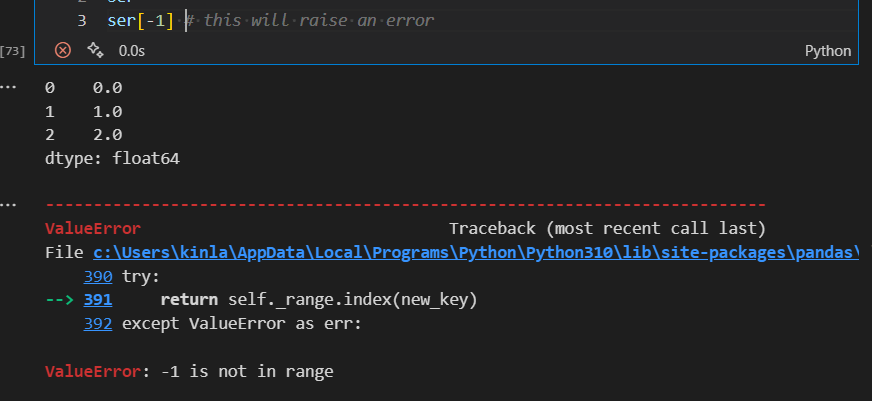

But still, you can still using `iloc()` to tell pandas you are doing position indexing: 

In [217]:
ser.iloc[-1]

2.0

In this Series, we are not using number as index. Therefore, pandas now accepting positional indexing: 

In [147]:
ser2 = pd.Series(np.arange(3.), index=["a", "b", "c"])
ser2[-1]

2.0

In [148]:
ser.iloc[-1]

2.0

In [149]:
ser[:2]

0    0.0
1    1.0
dtype: float64

## Pitfalls with chained indexing

In [150]:
# in the following, all `loc()` and `iloc()` are all subsetting.
# And finally we use `data`, which visualize the whole dataframe.

data.loc[:, "one"] = 1 # assigns 1 to all rows of column "one"
data
data.iloc[2] = 5 # assigns 5 to all columns of row 2
data

# assigns 3 to all rows of column "four" where value is greater than 5
data.loc[data["four"] > 5] = 3
data

,one,two,three,four
Ohio,1,0,0,0
Colorado,1,5,6,7
Utah,1,9,10,11
New York,1,13,14,15


,one,two,three,four
Ohio,1,0,0,0
Colorado,1,5,6,7
Utah,5,5,5,5
New York,1,13,14,15


,one,two,three,four
Ohio,1,0,0,0
Colorado,3,3,3,3
Utah,5,5,5,5
New York,3,3,3,3


In [151]:
data.loc[data.three == 5]["three"] = 6

C:\Users\kinla\AppData\Local\Temp\ipykernel_24760\867481848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data.three == 5]["three"] = 6


In [152]:
data

,one,two,three,four
Ohio,1,0,0,0
Colorado,3,3,3,3
Utah,5,5,5,5
New York,3,3,3,3


In [153]:
data.loc[data.three == 5, "three"] = 6
data

,one,two,three,four
Ohio,1,0,0,0
Colorado,3,3,3,3
Utah,5,5,6,5
New York,3,3,3,3


## Arithmetic and data alignment

- Pandas can make it much simpler to work with objects that have different indexes. 

In [154]:
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=["a", "c", "d", "e"])
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1],
               index=["a", "c", "e", "f", "g"])
s1
s2

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64

a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64

Adding 2 dataframes with different row label yields: 

In [155]:
s1 + s2

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

In [156]:
df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=list("bcd"),
                   index=["Ohio", "Texas", "Colorado"])
df2 = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list("bde"),
                   index=["Utah", "Ohio", "Texas", "Oregon"])
df1
df2

,b,c,d
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
Colorado,6.0,7.0,8.0


,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [157]:
df1 + df2

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


In [158]:
df1 = pd.DataFrame({"A": [1, 2]})
df2 = pd.DataFrame({"B": [3, 4]})
df1
df2
df1 + df2

,A
0,1
1,2


,B
0,3
1,4


,A,B
0,NaN,NaN
1,NaN,NaN


In [159]:
df1 = pd.DataFrame(np.arange(12.).reshape((3, 4)),
                   columns=list("abcd"))
df2 = pd.DataFrame(np.arange(20.).reshape((4, 5)),
                   columns=list("abcde"))
df2.loc[1, "b"] = np.nan
df1
df2

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,NaN,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [160]:
df1 + df2

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,NaN,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


In [161]:
df1.add(df2, fill_value=0)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,5.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [162]:
1 / df1
df1.rdiv(1)

,a,b,c,d
0,inf,1.000000,0.500000,0.333333
1,0.250,0.200000,0.166667,0.142857
2,0.125,0.111111,0.100000,0.090909


,a,b,c,d
0,inf,1.000000,0.500000,0.333333
1,0.250,0.200000,0.166667,0.142857
2,0.125,0.111111,0.100000,0.090909


In [163]:
df1.reindex(columns=df2.columns, fill_value=0)

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,0
1,4.0,5.0,6.0,7.0,0
2,8.0,9.0,10.0,11.0,0


In [164]:
arr = np.arange(12.).reshape((3, 4))
arr
arr[0]
arr - arr[0]

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.]])

array([0., 1., 2., 3.])

array([[0., 0., 0., 0.],
       [4., 4., 4., 4.],
       [8., 8., 8., 8.]])

In [165]:
frame = pd.DataFrame(np.arange(12.).reshape((4, 3)),
                     columns=list("bde"),
                     index=["Utah", "Ohio", "Texas", "Oregon"])
series = frame.iloc[0]
frame
series

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


b    0.0
d    1.0
e    2.0
Name: Utah, dtype: float64

In [166]:
frame - series

,b,d,e
Utah,0.0,0.0,0.0
Ohio,3.0,3.0,3.0
Texas,6.0,6.0,6.0
Oregon,9.0,9.0,9.0


In [167]:
series2 = pd.Series(np.arange(3), index=["b", "e", "f"])
series2
frame + series2

b    0
e    1
f    2
dtype: int32

,b,d,e,f
Utah,0.0,NaN,3.0,NaN
Ohio,3.0,NaN,6.0,NaN
Texas,6.0,NaN,9.0,NaN
Oregon,9.0,NaN,12.0,NaN


In [168]:
series3 = frame["d"]
frame
series3
frame.sub(series3, axis="index")

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


Utah       1.0
Ohio       4.0
Texas      7.0
Oregon    10.0
Name: d, dtype: float64

,b,d,e
Utah,-1.0,0.0,1.0
Ohio,-1.0,0.0,1.0
Texas,-1.0,0.0,1.0
Oregon,-1.0,0.0,1.0


In [169]:
frame = pd.DataFrame(np.random.standard_normal((4, 3)),
                     columns=list("bde"),
                     index=["Utah", "Ohio", "Texas", "Oregon"])
frame
np.abs(frame)

,b,d,e
Utah,-0.204708,0.478943,-0.519439
Ohio,-0.555730,1.965781,1.393406
Texas,0.092908,0.281746,0.769023
Oregon,1.246435,1.007189,-1.296221


,b,d,e
Utah,0.204708,0.478943,0.519439
Ohio,0.555730,1.965781,1.393406
Texas,0.092908,0.281746,0.769023
Oregon,1.246435,1.007189,1.296221


In [170]:
def f1(x):
    return x.max() - x.min()

frame.apply(f1)

b    1.802165
d    1.684034
e    2.689627
dtype: float64

In [171]:
frame.apply(f1, axis="columns")

Utah      0.998382
Ohio      2.521511
Texas     0.676115
Oregon    2.542656
dtype: float64

In [172]:
def f2(x):
    return pd.Series([x.min(), x.max()], index=["min", "max"])
frame.apply(f2)

,b,d,e
min,-0.555730,0.281746,-1.296221
max,1.246435,1.965781,1.393406


In [173]:
def my_format(x):
    return f"{x:.2f}"

frame.applymap(my_format)

,b,d,e
Utah,-0.20,0.48,-0.52
Ohio,-0.56,1.97,1.39
Texas,0.09,0.28,0.77
Oregon,1.25,1.01,-1.30


In [174]:
frame["e"].map(my_format)

Utah      -0.52
Ohio       1.39
Texas      0.77
Oregon    -1.30
Name: e, dtype: object

In [175]:
obj = pd.Series(np.arange(4), index=["d", "a", "b", "c"])
obj
obj.sort_index()

d    0
a    1
b    2
c    3
dtype: int32

a    1
b    2
c    3
d    0
dtype: int32

In [176]:
frame = pd.DataFrame(np.arange(8).reshape((2, 4)),
                     index=["three", "one"],
                     columns=["d", "a", "b", "c"])
frame
frame.sort_index()
frame.sort_index(axis="columns")

,d,a,b,c
three,0,1,2,3
one,4,5,6,7


,d,a,b,c
one,4,5,6,7
three,0,1,2,3


,a,b,c,d
three,1,2,3,0
one,5,6,7,4


In [177]:
frame.sort_index(axis="columns", ascending=False)

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


In [178]:
obj = pd.Series([4, 7, -3, 2])
obj.sort_values()

2   -3
3    2
0    4
1    7
dtype: int64

In [179]:
obj = pd.Series([4, np.nan, 7, np.nan, -3, 2])
obj.sort_values()

4   -3.0
5    2.0
0    4.0
2    7.0
1    NaN
3    NaN
dtype: float64

In [180]:
obj.sort_values(na_position="first")

1    NaN
3    NaN
4   -3.0
5    2.0
0    4.0
2    7.0
dtype: float64

In [181]:
frame = pd.DataFrame({"b": [4, 7, -3, 2], "a": [0, 1, 0, 1]})
frame
frame.sort_values("b")

,b,a
0,4,0
1,7,1
2,-3,0
3,2,1


,b,a
2,-3,0
3,2,1
0,4,0
1,7,1


In [182]:
frame.sort_values(["a", "b"])

,b,a
2,-3,0
0,4,0
3,2,1
1,7,1


In [183]:
obj = pd.Series([7, -5, 7, 4, 2, 0, 4])
obj.rank()

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64

In [184]:
obj.rank(method="first")

0    6.0
1    1.0
2    7.0
3    4.0
4    3.0
5    2.0
6    5.0
dtype: float64

In [185]:
obj.rank(ascending=False)

0    1.5
1    7.0
2    1.5
3    3.5
4    5.0
5    6.0
6    3.5
dtype: float64

In [186]:
frame = pd.DataFrame({"b": [4.3, 7, -3, 2], "a": [0, 1, 0, 1],
                      "c": [-2, 5, 8, -2.5]})
frame
frame.rank(axis="columns")

,b,a,c
0,4.3,0,-2.0
1,7.0,1,5.0
2,-3.0,0,8.0
3,2.0,1,-2.5


,b,a,c
0,3.0,2.0,1.0
1,3.0,1.0,2.0
2,1.0,2.0,3.0
3,3.0,2.0,1.0


In [187]:
obj = pd.Series(np.arange(5), index=["a", "a", "b", "b", "c"])
obj

a    0
a    1
b    2
b    3
c    4
dtype: int32

In [188]:
obj.index.is_unique

False

In [189]:
obj["a"]
obj["c"]

a    0
a    1
dtype: int32

4

In [190]:
df = pd.DataFrame(np.random.standard_normal((5, 3)),
                  index=["a", "a", "b", "b", "c"])
df
df.loc["b"]
df.loc["c"]

,0,1,2
a,0.274992,0.228913,1.352917
a,0.886429,-2.001637,-0.371843
b,1.669025,-0.438570,-0.539741
b,0.476985,3.248944,-1.021228
c,-0.577087,0.124121,0.302614


,0,1,2
b,1.669025,-0.438570,-0.539741
b,0.476985,3.248944,-1.021228


0   -0.577087
1    0.124121
2    0.302614
Name: c, dtype: float64

In [191]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
                   [np.nan, np.nan], [0.75, -1.3]],
                  index=["a", "b", "c", "d"],
                  columns=["one", "two"])
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [192]:
df.sum()

one    9.25
two   -5.80
dtype: float64

In [193]:
df.sum(axis="columns")

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

In [194]:
df.sum(axis="index", skipna=False)
df.sum(axis="columns", skipna=False)

one   NaN
two   NaN
dtype: float64

a     NaN
b    2.60
c     NaN
d   -0.55
dtype: float64

In [195]:
df.mean(axis="columns")

a    1.400
b    1.300
c      NaN
d   -0.275
dtype: float64

In [196]:
df.idxmax()

one    b
two    d
dtype: object

In [197]:
df.cumsum()

,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


In [198]:
df.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


In [199]:
obj = pd.Series(["a", "a", "b", "c"] * 4)
obj.describe()

count     16
unique     3
top        a
freq       8
dtype: object

In [200]:
price = pd.read_pickle("examples/yahoo_price.pkl")
volume = pd.read_pickle("examples/yahoo_volume.pkl")

In [201]:
returns = price.pct_change()
returns.tail()

,AAPL,GOOG,IBM,MSFT
Date,,,,
2016-10-17,-0.000680,0.001837,0.002072,-0.003483
2016-10-18,-0.000681,0.019616,-0.026168,0.007690
2016-10-19,-0.002979,0.007846,0.003583,-0.002255
2016-10-20,-0.000512,-0.005652,0.001719,-0.004867
2016-10-21,-0.003930,0.003011,-0.012474,0.042096


In [202]:
returns["MSFT"].corr(returns["IBM"])
returns["MSFT"].cov(returns["IBM"])

0.4997636114415116

8.870655479703548e-05

In [203]:
returns.corr()
returns.cov()

,AAPL,GOOG,IBM,MSFT
AAPL,1.000000,0.407919,0.386817,0.389695
GOOG,0.407919,1.000000,0.405099,0.465919
IBM,0.386817,0.405099,1.000000,0.499764
MSFT,0.389695,0.465919,0.499764,1.000000


,AAPL,GOOG,IBM,MSFT
AAPL,0.000277,0.000107,0.000078,0.000095
GOOG,0.000107,0.000251,0.000078,0.000108
IBM,0.000078,0.000078,0.000146,0.000089
MSFT,0.000095,0.000108,0.000089,0.000215


In [204]:
returns.corrwith(returns["IBM"])

AAPL    0.386817
GOOG    0.405099
IBM     1.000000
MSFT    0.499764
dtype: float64

In [205]:
returns.corrwith(volume)

AAPL   -0.075565
GOOG   -0.007067
IBM    -0.204849
MSFT   -0.092950
dtype: float64

In [206]:
obj = pd.Series(["c", "a", "d", "a", "a", "b", "b", "c", "c"])

In [207]:
uniques = obj.unique()
uniques

array(['c', 'a', 'd', 'b'], dtype=object)

In [208]:
obj.value_counts()

c    3
a    3
b    2
d    1
dtype: int64

In [209]:
pd.value_counts(obj.to_numpy(), sort=False)

c    3
a    3
d    1
b    2
dtype: int64

In [210]:
obj
mask = obj.isin(["b", "c"])
mask
obj[mask]

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool

0    c
5    b
6    b
7    c
8    c
dtype: object

In [211]:
to_match = pd.Series(["c", "a", "b", "b", "c", "a"])
unique_vals = pd.Series(["c", "b", "a"])
indices = pd.Index(unique_vals).get_indexer(to_match)
indices

array([0, 2, 1, 1, 0, 2], dtype=int64)

In [212]:
data = pd.DataFrame({"Qu1": [1, 3, 4, 3, 4],
                     "Qu2": [2, 3, 1, 2, 3],
                     "Qu3": [1, 5, 2, 4, 4]})
data

,Qu1,Qu2,Qu3
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


In [213]:
data["Qu1"].value_counts().sort_index()

1    1
3    2
4    2
Name: Qu1, dtype: int64

In [214]:
result = data.apply(pd.value_counts).fillna(0)
result

,Qu1,Qu2,Qu3
1,1.0,1.0,1.0
2,0.0,2.0,1.0
3,2.0,2.0,0.0
4,2.0,0.0,2.0
5,0.0,0.0,1.0


In [215]:
data = pd.DataFrame({"a": [1, 1, 1, 2, 2], "b": [0, 0, 1, 0, 0]})
data
data.value_counts()

,a,b
0,1,0
1,1,0
2,1,1
3,2,0
4,2,0


a  b
1  0    2
2  0    2
1  1    1
dtype: int64

In [216]:
pd.options.display.max_rows = PREVIOUS_MAX_ROWS